In [3]:
import pandas as pd
from datetime import datetime
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
import os
os.system("pip install holidays")
import holidays

In [17]:
import pandas_profiling

In [4]:
#импорт модулей для формирования модели
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [5]:
matplotlib.rcParams['figure.figsize'] =  [12.0, 8.0]

In [ ]:
'''

2. вариант 1) Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.
2. вариант2) COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней ( можно обновить данные по ссылке).

3. вариант 1) Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )
3. вариант 2) Сделайте ресемплинг COVID19 на интервалы 3 дня, неделя, 2 недели.Постройте график изменения среднего по выборке и среднего отклонения по выборке на группах для интервалах 3 дня, неделя, 2 недели (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

4. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

'''

In [ ]:
'''
SNoSerial Number
ObservationDateObservation date in mm/dd/yyyy
Province/StateProvince or State
Country/RegionCountry or region
Last UpdateLast update date time in UTC
ConfirmedCumulative number of confirmed cases
'''

## Подготовка данных 1 (EDA)

In [8]:
path = 'C:/Users/user/Documents/mydocs/gb_timeseries/data/'

In [9]:
df_all = pd.read_csv(path + 'covid_19_data.csv')
df_all.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [10]:
df= df_all[['ObservationDate', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']].loc[df_all['Country/Region']=='Russia']

In [11]:
df.columns = ['date', 'country', 'update', 'confirmed', 'deaths', 'recovered']

In [12]:
df.head()

,date,country,update,confirmed,deaths,recovered
482,01/31/2020,Russia,1/31/2020 23:59,2.0,0.0,0.0
540,02/01/2020,Russia,1/31/2020 16:13,2.0,0.0,0.0
610,02/02/2020,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
677,02/03/2020,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
745,02/04/2020,Russia,2020-01-31T16:13:45,2.0,0.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 482 to 14945
Data columns (total 6 columns):
date         75 non-null object
country      75 non-null object
update       75 non-null object
confirmed    75 non-null float64
deaths       75 non-null float64
recovered    75 non-null float64
dtypes: float64(3), object(3)
memory usage: 4.1+ KB


In [14]:
#переведем даты в формат дат

In [15]:
df[["date", "update"]] = df[["date", "update"]].apply(pd.to_datetime)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 482 to 14945
Data columns (total 6 columns):
date         75 non-null datetime64[ns]
country      75 non-null object
update       75 non-null datetime64[ns]
confirmed    75 non-null float64
deaths       75 non-null float64
recovered    75 non-null float64
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 4.1+ KB


In [17]:
df.describe()

,confirmed,deaths,recovered
count,75.000000,75.000000,75.000000
mean,1949.493333,14.960000,139.626667
std,4427.248796,35.508826,341.506708
min,2.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000
50%,13.000000,0.000000,3.000000
75%,938.000000,3.500000,41.500000
max,21102.000000,170.000000,1694.000000


In [11]:
# проверим пропуски

In [18]:
df.isnull().sum()

date         0
country      0
update       0
confirmed    0
deaths       0
recovered    0
dtype: int64

## Визуализация данных

In [19]:
df_covid = df.groupby(['date'])['confirmed', 'deaths', 'recovered'].sum()

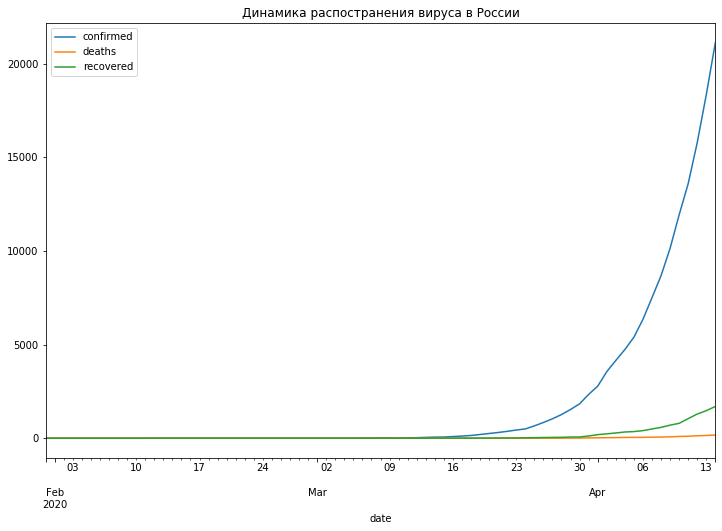

In [20]:
df_covid.plot()
plt.title('Динамика распостранения вируса в России')
plt.show()

In [19]:
#pandas_profiling.ProfileReport(df)

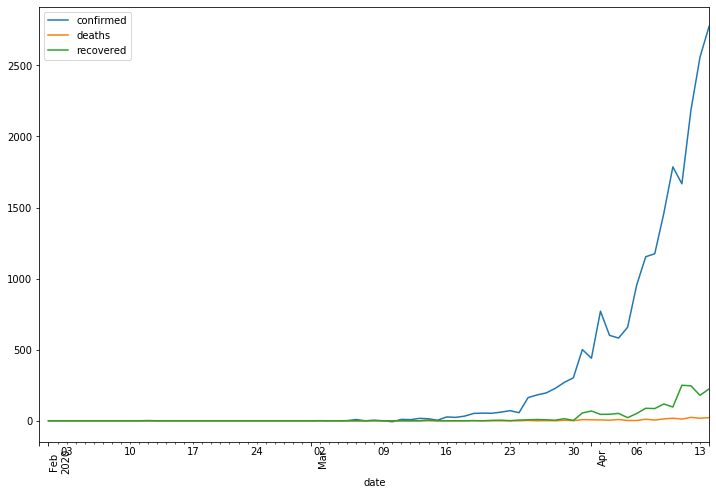

In [21]:
df_covid.diff(1).plot()
plt.xticks(label = df_covid.index.get_level_values('date'), rotation=90)
plt.show()

### Оценим динамику разности на фоне введения нерабочей недели

In [22]:
vacation_start = ['2020-03-28']
data_v = pd.to_datetime(vacation_start)

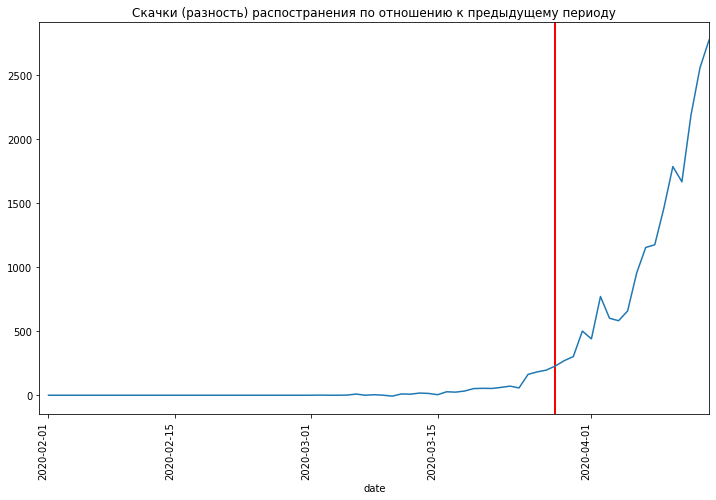

In [23]:
plt.axvline(x=data_v, linewidth=2, color='r')
df_covid.confirmed.diff(1).plot()
plt.title('Скачки (разность) распостранения по отношению к предыдущему периоду')
plt.xticks(label = df_covid.index.get_level_values('date'), rotation=90)
plt.show()

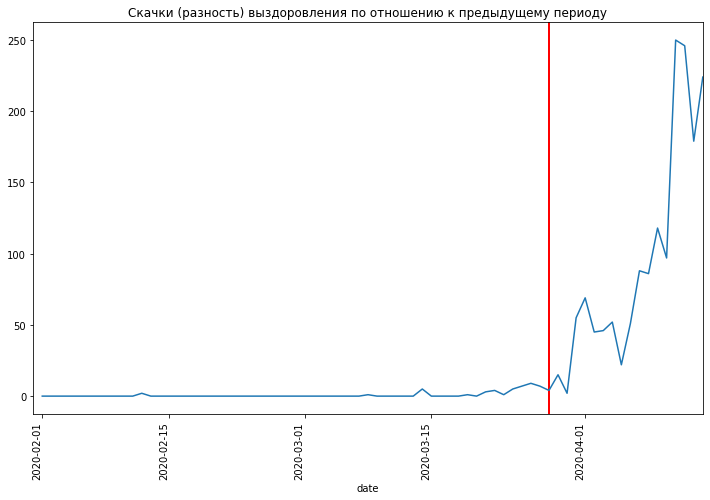

In [24]:
plt.axvline(x=data_v, linewidth=2, color='r')
df_covid.recovered.diff(1).plot()
plt.title('Скачки (разность) выздоровления по отношению к предыдущему периоду')
plt.xticks(label = df_covid.index.get_level_values('date'), rotation=90)
plt.show()

## Оценим интервал в 3 дня

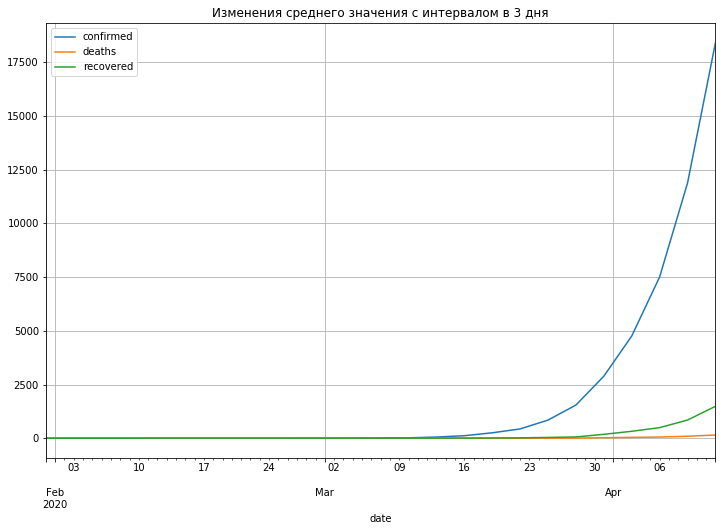

In [28]:
#plt.axvline(x=data_v, linewidth=2, color='r')
df_covid.resample("3D").mean().plot()
plt.title('Изменения среднего значения с интервалом в 3 дня' )
#plt.axvline(x=data_v, linewidth=2, color='r')
plt.grid()
plt.show()

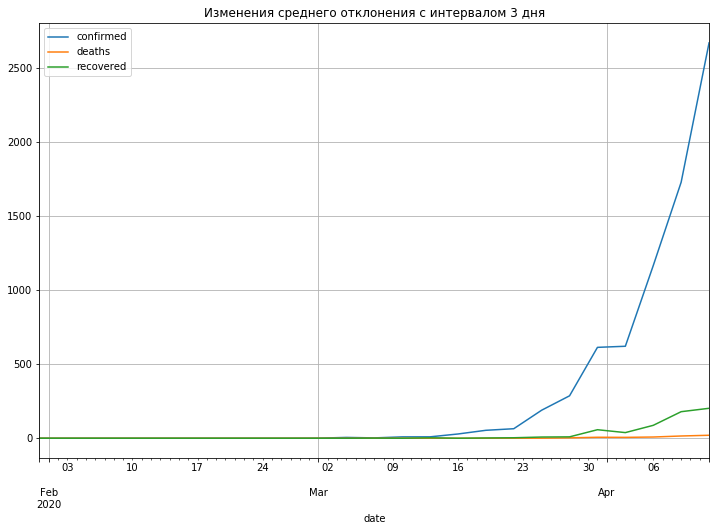

In [29]:
df_covid.resample("3D").std().plot()
plt.title('Изменения среднего отклонения с интервалом 3 дня')
plt.grid()
plt.show()

## Оценим интервал в неделю

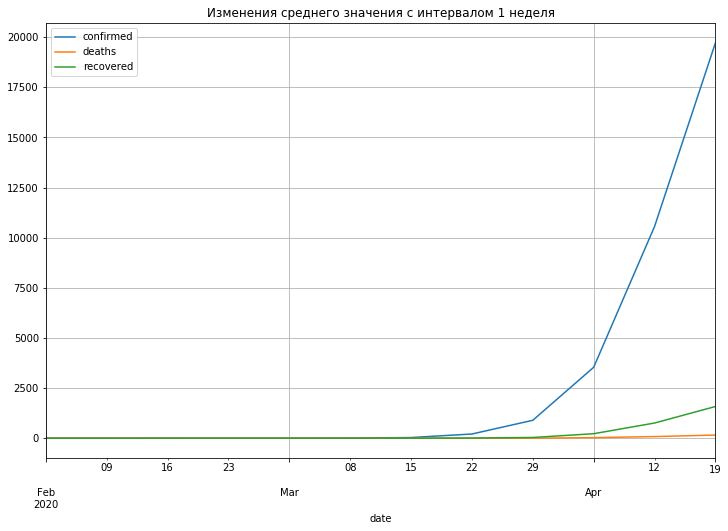

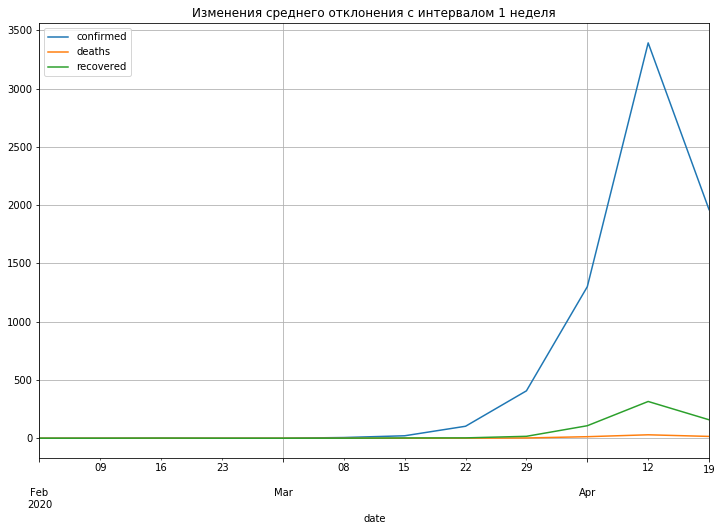

In [31]:
df_covid.resample("W").mean().plot()
plt.title('Изменения среднего значения с интервалом 1 неделя')
plt.grid()
plt.show()

df_covid.resample("W").std().plot()
plt.title('Изменения среднего отклонения с интервалом 1 неделя')
plt.grid()
plt.show()

In [61]:
## Оценим интервал в 2 недели

In [32]:
df_covid.resample("2W").mean()

,confirmed,deaths,recovered
date,,,
2020-02-02,2.000000,0.000000,0.000000
2020-02-16,2.000000,0.000000,0.714286
2020-03-01,2.000000,0.000000,2.000000
2020-03-15,21.285714,0.000000,3.285714
2020-03-29,552.928571,2.000000,23.857143
2020-04-12,7048.642857,55.428571,492.142857
2020-04-26,19715.000000,159.000000,1582.000000


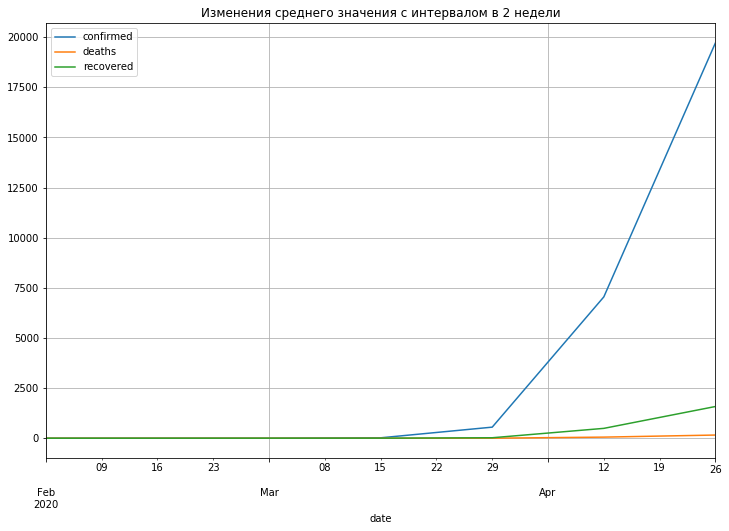

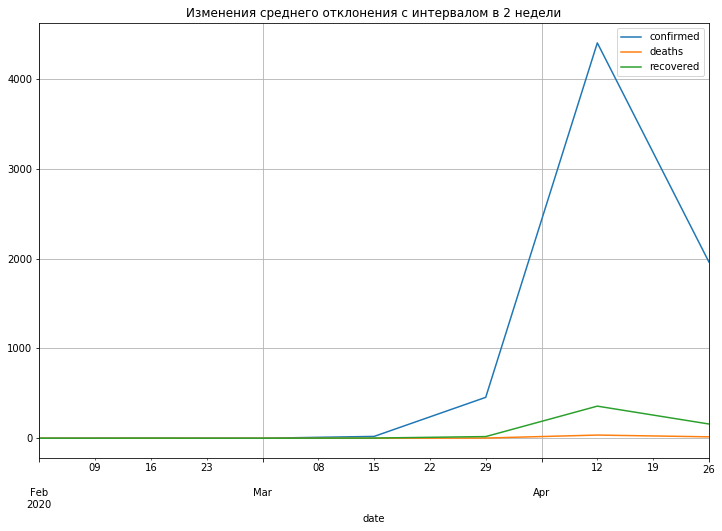

In [33]:
df_covid.resample("2W").mean().plot()
plt.title('Изменения среднего значения с интервалом в 2 недели')
plt.grid()
plt.show()

df_covid.resample("2W").std().plot()
plt.title('Изменения среднего отклонения с интервалом в 2 недели')
plt.grid()
plt.show()

In [ ]:
#https://pypi.org/project/holidays/
!pip install holidays
import holidays

Резюме:

1. несмотря на восходящие тренд, наметились позитивные тренды в разности восстановления
2. очевидно, что анализировать данные невозможно без привязким к ключевым событиям, поэтому была введена дата объявления нерабочей недели, но выводы пока еще делать рано 
3. по сравнению с анализом за 2 недели, неделю и 3 дня, наиболее полезныей выбор это интервал в 3 дня, где мы видим, как отличается график среднего отклонения

## Задание 3

In [ ]:
'''
Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

Подберите параметры модели SARIMAX для этого ряда.

Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Возмите вариант 1 или 2

- Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
- Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )
Оцените результат моделирования

Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.

'''

In [42]:
data_d = df_covid.resample("D").mean()
data_m =df_covid.resample("M").mean()
data_w = df_covid.resample("W").mean()
data_2w = df_covid.resample('2W').mean()

In [43]:
data_2w.head()

,confirmed,deaths,recovered
date,,,
2020-02-02,2.000000,0.0,0.000000
2020-02-16,2.000000,0.0,0.714286
2020-03-01,2.000000,0.0,2.000000
2020-03-15,21.285714,0.0,3.285714
2020-03-29,552.928571,2.0,23.857143


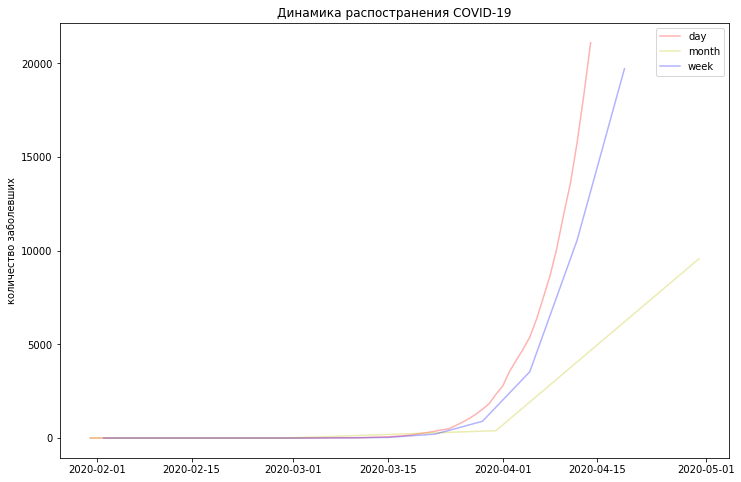

In [51]:
plt.plot( data_d.index, data_d['confirmed'].values, 'r',alpha =0.3, label='day' )
plt.plot( data_m.index, data_m['confirmed'].values, 'y',alpha =0.3, label='month' )
plt.plot( data_w.index, data_w['confirmed'].values, 'b',alpha =0.3, label='week' )
plt.title('Динамика распостранения COVID-19' )
plt.ylabel ( 'количество заболевших' )
plt.legend()
plt.show()

In [ ]:
#оценим авторегрессию и частичную с лагом в 1 мес 

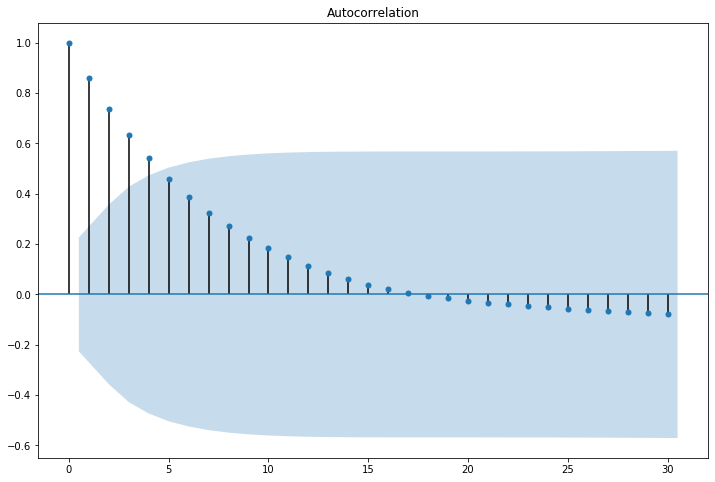

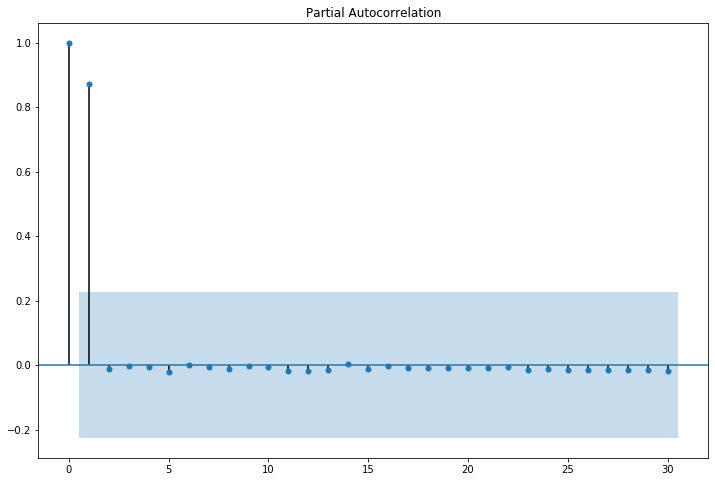

In [57]:
sm.graphics.tsa.plot_acf(data_d['confirmed'].values, lags=30)
plt.show()

#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(data_d['confirmed'].values, lags=30)
plt.show()

## построим модель SARIMAX на основе ежемесячных данных 

In [79]:
import warnings
warnings.filterwarnings("ignore") # отключает предупреждения

In [78]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 30) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 30)
SARIMAX: (0, 0, 1) x (0, 0, 0, 30)
SARIMAX: (0, 0, 2) x (0, 0, 0, 30)
SARIMAX: (0, 0, 2) x (0, 0, 1, 30)


In [82]:
aic = []
params_ =[]
params_seasonal_ = []

warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_d['confirmed'].values[:-12],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            aic.append(results.aic)
            params_.append(param)
            params_seasonal_.append(param_seasonal)
        except:
            continue

In [86]:
df_p = pd.DataFrame(zip(params_, params_seasonal_, aic), columns =['arima', 'seasonal', 'aic']) 

In [90]:
df_p.sort_values(by='aic', ascending=True ).head(10)

,arima,seasonal,aic
74,"(1, 1, 0)","(0, 0, 2, 30)",-2.168730
110,"(2, 0, 0)","(0, 0, 2, 30)",-1.018268
76,"(1, 1, 0)","(0, 1, 1, 30)",0.756798
62,"(1, 0, 1)","(0, 0, 2, 30)",1.701645
112,"(2, 0, 0)","(0, 1, 1, 30)",3.176987
40,"(0, 2, 0)","(0, 1, 1, 30)",4.000000
130,"(2, 1, 0)","(0, 1, 1, 30)",4.228651
94,"(1, 2, 0)","(0, 1, 1, 30)",6.000000
23,"(0, 1, 0)","(0, 1, 2, 30)",6.000000
46,"(0, 2, 1)","(0, 1, 1, 30)",6.000000
